<a href="https://colab.research.google.com/github/FelipeRamosOliveira/Portfolio-Python/blob/master/Tecnicas%20de%20Machine%20Lear.nig%20Aplicadas%20-%20I%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green> INTRODUÇÃO A MACHINE LEARNING
Esse notebook apresentas os primeiros passos pra ingressar na área de machine learnig.Esse notebook contem:

* Noções básicas de data science
* Noções de data visualization
* Preditores baseados em *support vector machine* (SVM)
* Preditores baseados em árvores de deecisão

Os notebooks a seguir podem ser utéis para compreender esse notebook:

* [https://colab.research.google.com/github/FelipeRamosOliveira/Notebooks/blob/master/DS_NUMPY.ipynb](https://)

* [https://colab.research.google.com/github/FelipeRamosOliveira/Notebooks/blob/master/DS_SEABORN.ipynb](https://)


# <font color=green> AULA 1 - INTRODUÇÃO A DATA SCIENCE


## Importar bibliotecas

In [0]:
import seaborn as sns
print(sns.__version__)

0.9.0


## 1.1. Analise de filmes (Infotmações Gerais do Data Frame)

### 1.1.1. Importar bases de dados

In [0]:
import pandas as pd
#
uri="https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/aula4/aula4.1/movies.csv"
filmes=pd.read_csv(uri)
#
filmes.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 1.1.2. Informações gerais

In [0]:
filmes.columns = ['ID','Titulo','Genero']
filmes.tail()

,ID,Titulo,Genero
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [0]:
uri="https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/aula1/aula1.2/ratings.csv"
notas=pd.read_csv(uri)
notas.columns=['UsurarioID','FilmeID','Nota','Momento']
notas.head()

,UsurarioID,FilmeID,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas['Nota'].head #Serie

<bound method NDFrame.head of 0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Nota, Length: 100836, dtype: float64>

In [0]:
notas['Nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [0]:
notas['Nota'].mean()

3.501556983616962

In [0]:
notas['Nota'].min()

0.5

In [0]:
notas['Nota'].max()

5.0

## 1.2. Analise de notas (Descritiva, Histograma e Boxplot)

In [0]:
notas.describe()

,UsurarioID,FilmeID,Nota,Momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
notas.Nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: Nota, dtype: float64

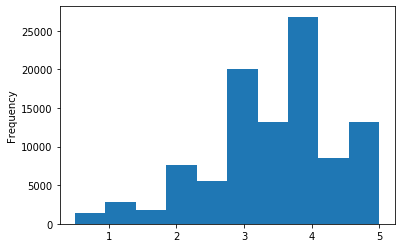

In [0]:
notas.Nota.plot(kind='hist')

In [0]:
notas.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

In [0]:
import seaborn as sns

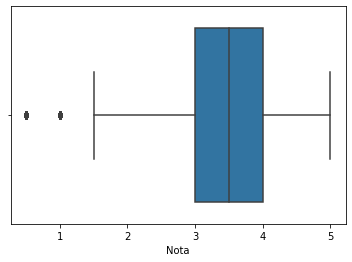

In [0]:
sns.boxplot(notas.Nota)

## 1.3. Análise notas de filmes epecificos (Querys e SeaBorn)

In [0]:
notas.query('FilmeID==1').Nota.mean()

3.9209302325581397

In [0]:
media_por_filme=notas.groupby('FilmeID').Nota.mean()
media_por_filme

FilmeID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: Nota, Length: 9724, dtype: float64

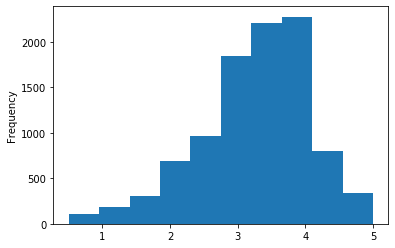

In [0]:
media_por_filme.plot(kind='hist')

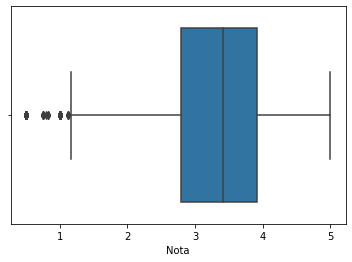

In [0]:
sns.boxplot(media_por_filme)

In [0]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

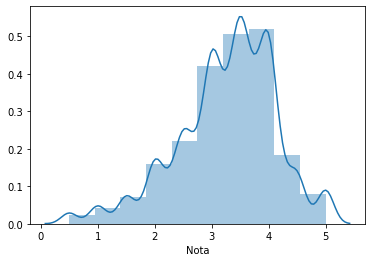

In [0]:
sns.distplot(media_por_filme,bins=10)

## 1.4. Filmes do TMDB (Tratamento de dados e Data Visualization)

In [0]:
uri='https://raw.githubusercontent.com/FelipeRamosOliveira/DataFrames/master/tmdb_5000_movies.csv'
tmdb=pd.read_csv(uri)
tmdb.head(1)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [0]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
tmdb.budget.describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [0]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'he', 'th', 'ta', 'ro', 'cs', 'id', 'ar', 'el',
       'ps', 'vi', 'hu', 'te', 'sl', 'nb', 'pl', 'tr', 'no', 'is', 'ky', 'af',
       'xx'],
      dtype='object')

In [0]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [0]:
tmdb['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


In [0]:
contagem_de_lingua=tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns=['original_language','total']
contagem_de_lingua.head()


,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


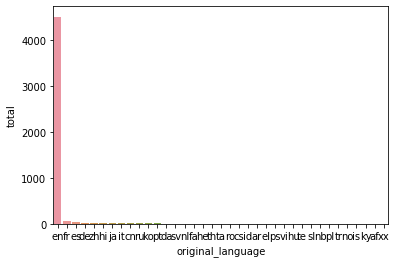

In [0]:
sns.barplot(x='original_language',y='total',data=contagem_de_lingua)

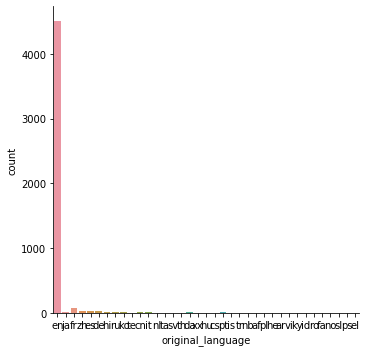

In [0]:
sns.catplot(x='original_language', kind='count', data=tmdb)

([<matplotlib.patches.Wedge at 0x7f3378942438>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

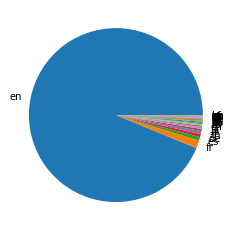

In [0]:
import matplotlib.pyplot as plt

plt.pie(contagem_de_lingua.total,labels=contagem_de_lingua.original_language)

In [0]:
total_por_lingua=tmdb.original_language.value_counts()
total_geral=total_por_lingua.sum()
total_de_ingles=total_por_lingua.loc['en']
total_do_resto=total_geral-total_de_ingles

In [0]:
dados={'lingua':['ingles','outros'], 
       'total':[total_de_ingles,total_do_resto]}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

([<matplotlib.patches.Wedge at 0x7f337889b438>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

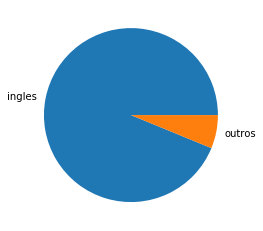

In [0]:
dados=pd.DataFrame(dados)

plt.pie(dados.total,labels=dados.lingua)

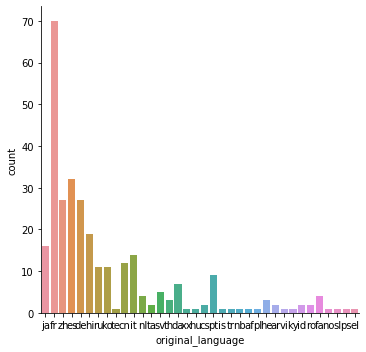

In [0]:
outras_linguas=tmdb.query("original_language!='en' ")
sns.catplot(x='original_language', kind='count', data=outras_linguas)

In [0]:
total_outras_linguas=tmdb.query("original_language!='en' ").original_language.value_counts()
total_outras_linguas.head()

fr    70
es    32
zh    27
de    27
hi    19
Name: original_language, dtype: int64

Editando as figuras

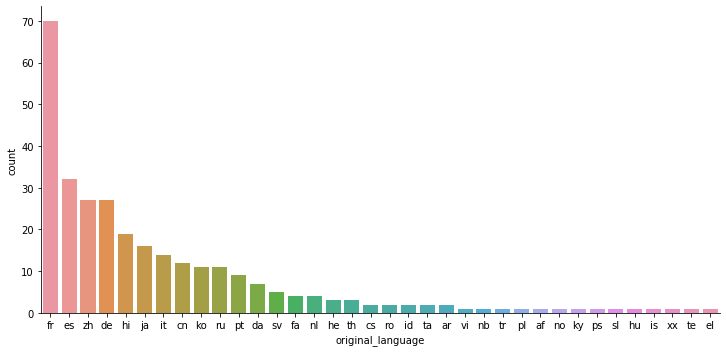

In [0]:
outras_linguas=tmdb.query("original_language!='en' ")
sns.catplot(x='original_language', kind='count', 
            data=outras_linguas,aspect=2,order=total_outras_linguas.index)

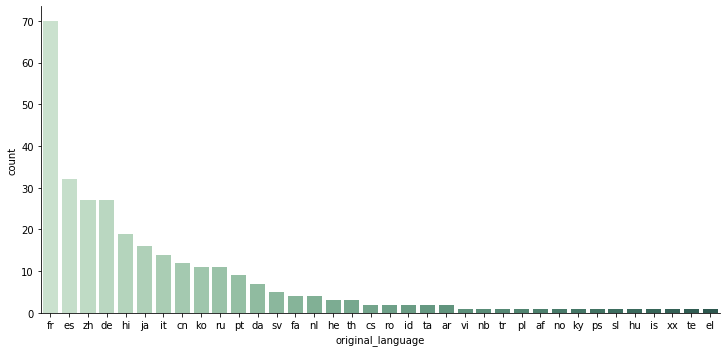

In [0]:
outras_linguas=tmdb.query("original_language!='en' ")
sns.catplot(x='original_language', kind='count', 
            data=outras_linguas,aspect=2,
            palette='ch:2.5,-.2,dark=.3',
            order=total_outras_linguas.index)

## 1.5. Voltando ao moveleans (Data Visualisation)

In [0]:
notas_toy_story=notas.query('FilmeID==1')
notas_jumanji=notas.query('FilmeID==2')
print(len(notas_toy_story) , len(notas_jumanji)     )

215 110


In [0]:
print("Nota média do Toy Story %.2f" % notas_toy_story.Nota.mean())
print("Nota média do Jumanji   %.2f" % notas_jumanji.Nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji   3.43


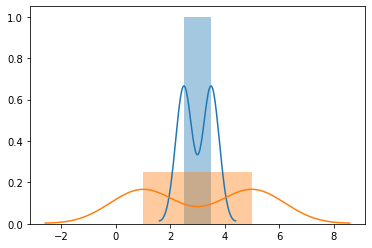

In [0]:
import numpy as np

a=np.array([2.5]*10)
b=np.array([3.5]*10)
filme1=np.append(a,b)

a=np.array([1]*10)
b=np.array([5]*10)
filme2=np.append(a,b)

sns.distplot(filme1)
sns.distplot(filme2)


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

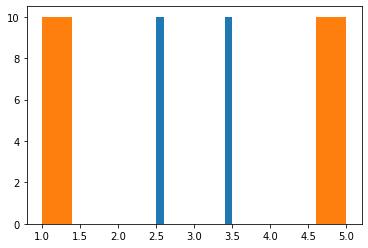

In [0]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f337841d0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f337841db70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3378427588>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3378427240>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f337841d470>,
  <matplotlib.lines.Line2D at 0x7f3378427f60>]}

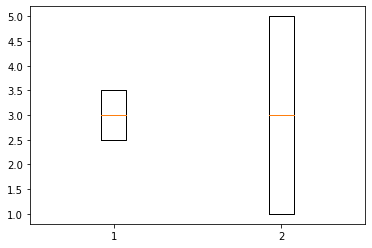

In [0]:
plt.boxplot([filme1,filme2])

{'boxes': [<matplotlib.lines.Line2D at 0x7f3378395978>,
 'caps': [<matplotlib.lines.Line2D at 0x7f33783a3358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f33783a3d30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f33783a39e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3378395c88>,
  <matplotlib.lines.Line2D at 0x7f33783b0748>]}

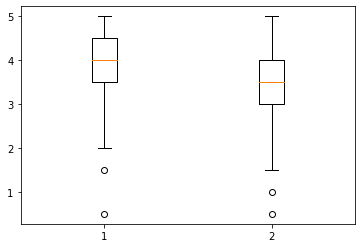

In [0]:
plt.boxplot([notas_toy_story.Nota,notas_jumanji.Nota])

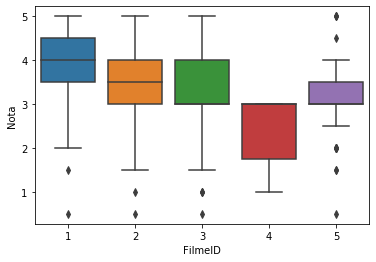

In [0]:
sns.boxplot(x='FilmeID',y='Nota',data=notas.query ('FilmeID in [1,2,3,4,5]')    )

# <font color=green> AULA 2. PREDITORES (SVM E SVC)

## Importar Bibliotecas

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

## 2.1. Importar Base de Dados

In [0]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head(3)

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0


In [0]:
# Traduizir colunas
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)

## 2.2. Treinando e Testando os Preditores

In [0]:
# Definir varivés de entrada do modelo - (x)

x = dados[["principal","como_funciona","contato"]]
x.head(3)

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0


In [0]:
# Definir varivés de saida do modelo - (y)
y = dados["comprou"]
y.tail(3)

96    0
97    0
98    0
Name: comprou, dtype: int64

### 2.2.1. Definir conjunto de treinamento e teste - (Manualmente)

In [0]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


### 2.2.2. Construir modelo e testar acurácia - (Auomáticamente)

In [0]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 95.83%


## 2.3. Treino e Teste Automatizados

In [0]:
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

#Obs: sem o seed o estado randômico geraria modelos diferentes e acurácias diferentes

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


In [0]:
#Contar as repostas do treino
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

## 2.4. Treino Estratificado

In [0]:
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,random_state = SEED, test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


In [0]:
#Contar as repostas do treino
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [0]:
#Contar as repostas do teste
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

# <font color=green> AULA 3 - DATA VISUALIZATION E PREDITORES NÃO-LINARES

## Instalar SeaBorn

In [0]:
!pip install SeaBorn

## Importar Bibliotecas

In [0]:
#Bibliotecas principais
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#sDo Scikit-Learn
from sklearn.svm import LinearSVC   #Preditor Linear
from sklearn.svm import SVC         #Preditor Não-Linear
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## 3.1 Importar Base de Dados

In [0]:
uri='https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados=pd.read_csv(uri)

dados.columns=['nao_finalizados','horas_esperadas','preco']
dados.head(3)

,nao_finalizados,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577


In [0]:
#Trocar sim/não por 1/0
troca={0:1,1:0}
dados['finalizados']=dados.nao_finalizados.map(troca)
dados.tail(3)

,nao_finalizados,horas_esperadas,preco,finalizados
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


## 3.2. SeaBorn

### 3.2.1 Gráfico de dispersão (*scatterplot*)

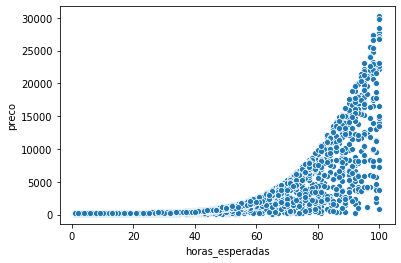

In [0]:
#Grafico default
G1=sns.scatterplot(x='horas_esperadas',y='preco',data=dados)

#Obs: se o gráfico não for atribuido a uma varivél ele apenas idica o esapço de memoria que ele foi alocado

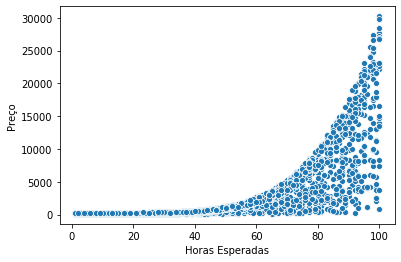

In [0]:
#Nomear eixos do gráfico
G1.set(xlabel='Horas Esperadas', ylabel='Preço')
G1.get_figure()

In [0]:
#Adicionado subtitulos (Opcional)
# G1.figure.suptitle('Preço x Horas Esperadas')
# G1.get_figure()

[Text(0, 0.5, 'Preço'), Text(0.5, 0, 'Horas Esperadas')]

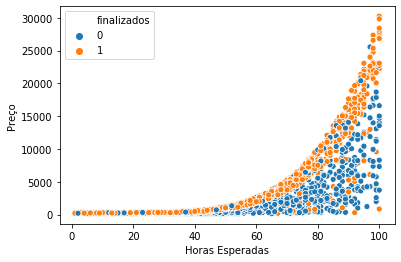

In [0]:
#Usar o HUE pra separar as cores do gráfico
G2=sns.scatterplot(x='horas_esperadas',y='preco',hue='finalizados',data=dados)
G2.set(xlabel='Horas Esperadas', ylabel='Preço')

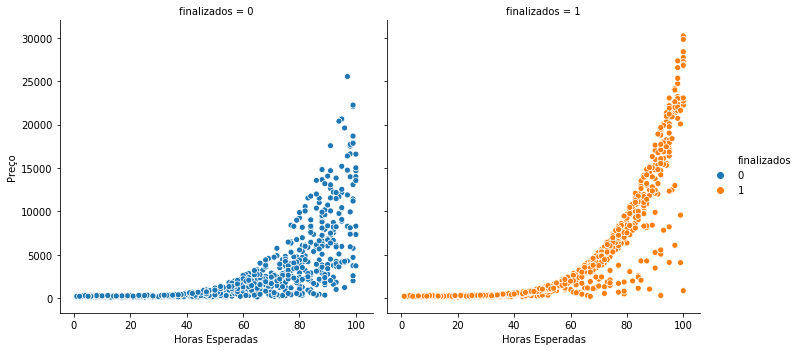

In [0]:
#Separando as repostas com col
G3=sns.relplot(x='horas_esperadas',y='preco',hue='finalizados',col='finalizados',data=dados)
G3.set(xlabel='Horas Esperadas', ylabel='Preço')

### 3.2.2. Preditor linear

In [0]:
#Definir X e Y

x=dados[['horas_esperadas','preco']]
y=dados['finalizados']

#Treinar e testar modelo

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 64.44%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


> **Os classificadores/preditores bobos (dummy), basicamente chutam uma das repostas (geralemente a mais frequente no treino) como solução para todos os dados de entrada.Se o modelo for tão ruim,ou próximo do dummy, que dizer ele é ineficaiz** 

In [0]:
#Criar uma referência para julgar o preditor (dummy predictor)
chute=np.ones(540)
acuracia = accuracy_score(teste_y, chute) * 100
print("A acurácia de baseline %.2f%%" % acuracia)

A acurácia de baseline 52.59%


[Text(0, 0.5, 'Preço'), Text(0.5, 0, 'Horas Esperadas')]

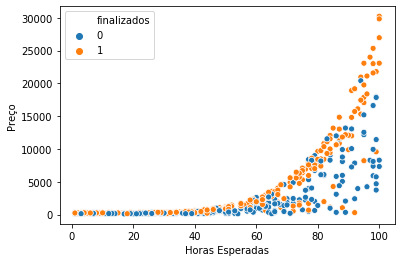

In [0]:
#Visulizar dados de teste
G4=sns.scatterplot(x='horas_esperadas',y='preco',hue=teste_y,data=teste_x)
G4.set(xlabel='Horas Esperadas', ylabel='Preço')

#### 2.2.1. Visulizar predições 

 * Definir o grid de apresentação
 
 $$P_x = \frac{\Delta x}{Pixels}$$

 $$P_y = \frac{\Delta y}{Pixels}$$

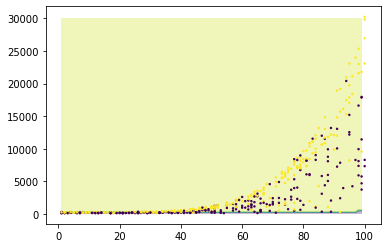

In [0]:
#Delta X
xmin=teste_x.horas_esperadas.min()
xmax=teste_x.horas_esperadas.max()

#Delta Y
ymin=teste_x.preco.min()
ymax=teste_x.preco.max()

#Malha
pixels=100
eixo_x=np.arange(xmin,xmax,(xmax-xmin)/pixels)
eixo_y=np.arange(ymin,ymax,(ymax-ymin)/pixels)

xx,yy=np.meshgrid(eixo_x,eixo_y)
pontos=np.c_[xx.ravel(),yy.ravel()]

#Assumido que a cor é uma terceira dimensão
Z=modelo.predict(pontos)
Z=Z.reshape(xx.shape)

#Plotando com Matplotlib
G5=plt.contourf(xx, yy, Z, alpha=0.3)
G5=plt.scatter(teste_x.horas_esperadas,teste_x.preco,c=teste_y,s=2)

> **Em amarelo está predição do modelo.Nota-se que o modelo linear só teve uma reposta como saída , oque justifica sua baixa acurácia** 

## 3.3. Preditores não-lineares

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


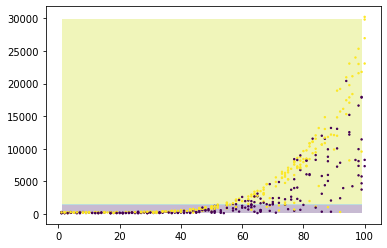

In [0]:
#Sem redimensionar as variáveis
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

#Visualizar
xmin=teste_x.horas_esperadas.min()
xmax=teste_x.horas_esperadas.max()

ymin=teste_x.preco.min()
ymax=teste_x.preco.max()

pixels=100
eixo_x=np.arange(xmin,xmax,(xmax-xmin)/pixels)
eixo_y=np.arange(ymin,ymax,(ymax-ymin)/pixels)

xx,yy=np.meshgrid(eixo_x,eixo_y)
pontos=np.c_[xx.ravel(),yy.ravel()]

Z=modelo.predict(pontos)
Z=Z.reshape(xx.shape)

import matplotlib.pyplot as plt

G6=plt.contourf(xx, yy, Z, alpha=0.3)

G6=plt.scatter(teste_x.horas_esperadas,teste_x.preco,c=teste_y,s=2)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


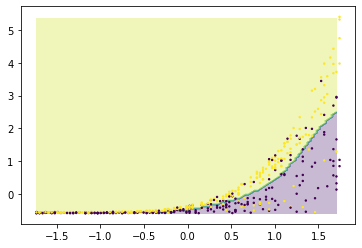

In [0]:
#Redimensionando as varivéis
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler=StandardScaler()
scaler.fit(treino_x)
treino_x=scaler.transform(treino_x)
teste_x=scaler.transform(teste_x)



modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


# Visulizar 

data_x=teste_x[:,0]
data_y=teste_x[:,1]

xmin=data_x.min()
xmax=data_x.max()

ymin=data_y.min()
ymax=data_y.max()

pixels=100
eixo_x=np.arange(xmin,xmax,(xmax-xmin)/pixels)
eixo_y=np.arange(ymin,ymax,(ymax-ymin)/pixels)

xx,yy=np.meshgrid(eixo_x,eixo_y)
pontos=np.c_[xx.ravel(),yy.ravel()]

Z=modelo.predict(pontos)
Z=Z.reshape(xx.shape)



G7=plt.contourf(xx, yy, Z, alpha=0.3)
G7=plt.scatter(data_x,data_y,c=teste_y,s=2)

> **Qaundo as variáveisestão em escalas muito diferentes, é comum que o erro predição aumente.Por isso , reesclar as varivéis é uma boa solução quando se trabalha em escalas muito distintas.Varivés reescaladas não podem ser trabalhadas diretamente e não tem facil compreesão como as variavés originais**

# <font color=green> AULA 4 - COMPARANDO MODELOS E PREDITOR TIPO ÁRVORE 

## Instalar Graphviz

In [0]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


## Importar bibliotecas

In [0]:
import pandas as pd
import numpy as np
import graphviz

from datetime import datetime
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier     #Classificador tipo árvore
from sklearn.tree import export_graphviz



## 4.1 Importar e Tratar Base de Dados

In [0]:
uri='https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados=pd.read_csv(uri)

#Mudar nomes de colunas
dados.columns=['contador','milhas_por_ano','ano_do_modelo','preco','vendido']

#Trocar sim/não por 1/0
troca={'no':0,'yes':1}
dados['vendido']=dados.vendido.map(troca)

#Criar novas colunas de varivés 
ano_atual=datetime.today().year
dados['idade_do_modelo']=ano_atual-dados.ano_do_modelo
dados['km_por_ano']=dados.milhas_por_ano*1.60934

dados.head(3)

,contador,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806


In [0]:
#Apagar colunas de variáveis indesejadas
dados=dados.drop(columns=['contador','milhas_por_ano','ano_do_modelo'],axis=1)
dados.head(3)

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806


## 4.2. Modelo Natural x Modelo Reescalado X Modelo Dummy

In [0]:
# Modelo dummy automatizado
dummy=DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia = dummy.score(teste_x,teste_y)*100

print("A acurácia do dummy foi de %.2f%%" % acuracia)


A acurácia do dummy foi de 49.26%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [0]:
# Modelo Natural
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do modelo foi de %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia do modelo foi de 55.19%


In [0]:
# Modelo com variáveis reescaldas

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler=StandardScaler()
scaler.fit(treino_x)
treino_x=scaler.transform(treino_x)
teste_x=scaler.transform(teste_x)



modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


## 4.3. Modelo de Árvores

In [0]:
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,test_size = 0.25,stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.48%


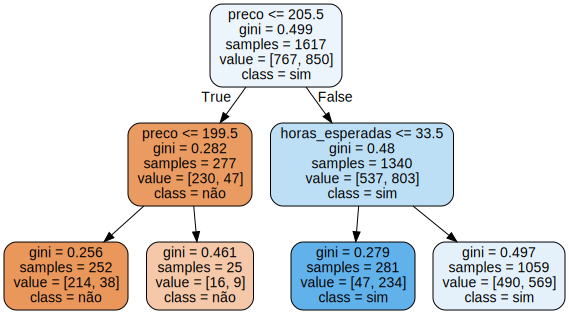

In [0]:
# Visulizando resultado
features=x.columns
dot_data = export_graphviz(modelo, out_file=None,filled=True,rounded=True,feature_names=features,class_names=['não','sim'])
G8 = graphviz.Source(dot_data)
G8
